In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
%load_ext autoreload
%autoreload 2

In [38]:
# Defining a toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                        [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear regression

In [49]:
class MyLinearRegression:
    def __init__(self):
        # TODO: Define the parameters of the model (weights and biases)
        self.w = Variable(torch.Tensor([0])).to(device).requires_grad_()
        self.b = Variable(torch.Tensor([0])).to(device).requires_grad_()
    
    def forward(self, x):
        # TODO: implement forward computation - compute predictions based on the inputs
        return self.w * x + self.b
    
    def parameters(self):
        # TODO: this function should return a list of parameters of the model
        return [self.w, self.b]
    
    def __call__(self, x):
        # Convenience function
        return self.forward(x)
    

def mselossfunc(pred, y):
    # TODO: implement the MSE loss function
    return (pred - y).pow(2).mean()

model = MyLinearRegression()
numpy_inputs = np.asarray([0.0, 1.0, 2.0], dtype = np.float32)
torch_inputs = Variable(torch.from_numpy(numpy_inputs)).to(device)
torch_outputs = model(torch_inputs).to(device)
print("Testing model: an input of %s gives a prediction:\n %s" % (numpy_inputs, torch_outputs))
check_mem_usage(device)

Testing model: an input of [0. 1. 2.] gives a prediction:
 tensor([0., 0., 0.], device='cuda:0', grad_fn=<AddBackward0>)
GeForce MX150
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [63]:
def train(features, labels, model, lossfunc, optimizer, num_epoch):

    for epoch in range(num_epoch):
        # TODO: Step 1 - create torch variables corresponding to features and labels
        inputs = Variable(torch.from_numpy(features)).to(device)
        targets = Variable(torch.from_numpy(labels)).to(device)

        # TODO: Step 2 - compute model predictions and loss
        outputs = model(inputs)
        loss = lossfunc(outputs, targets)
        
        # TODO: Step 3 - do a backward pass and a gradient update step
        optimizer.zero_grad()  
        loss.backward()
        optimizer.step()
        
        if epoch % 100 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epoch, loss.item()))
        
        
def visualize(x_train, y_train, model):
    # A convenience function for visualizing predictions given by the model

    predicted = model(Variable(torch.from_numpy(x_train)).to(device)).cpu().data.numpy()
    order = np.argsort(x_train, axis = 0)
    plt.plot(x_train[order].flatten(), y_train[order].flatten(), 'ro', label='Original data')
    plt.plot(x_train[order].flatten(), predicted[order].flatten(), label='Fitted line')
    plt.legend()
    plt.show()

Epoch [1/500], Loss: 0.2078
Epoch [101/500], Loss: 0.2058
Epoch [201/500], Loss: 0.2040
Epoch [301/500], Loss: 0.2022
Epoch [401/500], Loss: 0.2006


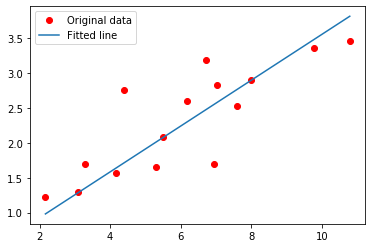

In [64]:
# Training and visualizing predictions made by linear regression model
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = mselossfunc, 
      optimizer = optimizer,
      num_epoch = 500)
visualize(x_train, y_train, model)

## Linear Regression (using nn package)

Epoch [1/500], Loss: 0.8991
Epoch [101/500], Loss: 0.1692
Epoch [201/500], Loss: 0.1692
Epoch [301/500], Loss: 0.1691
Epoch [401/500], Loss: 0.1691


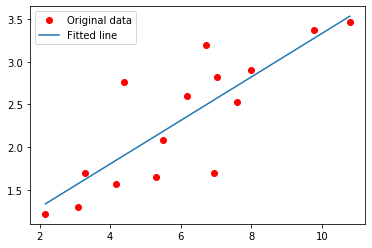

In [68]:
class NNLinearRegression(nn.Module):
    def __init__(self):
        super(NNLinearRegression, self).__init__()
        # TODO: Define the parameters of the model (linear nn layer)
        self.linear = nn.Linear(1, 1).cuda()
    
    def forward(self, x):
        # TODO: implement forward computation
        return self.linear(x)
    
# Training and visualizing predictions made by linear regression model (nn package)
# TODO: use loss function from nn package
lossfunc = nn.MSELoss()

model = NNLinearRegression()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = lossfunc,
      optimizer = optimizer,
      num_epoch = 500)
visualize(x_train, y_train, model)

## MLP

Epoch [1/500], Loss: 6.9534
Epoch [101/500], Loss: 0.2148
Epoch [201/500], Loss: 0.1856
Epoch [301/500], Loss: 0.1811
Epoch [401/500], Loss: 0.1779


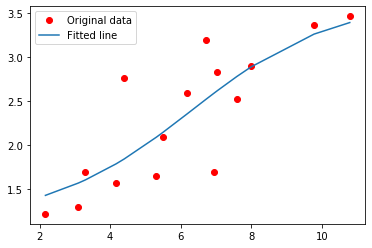

In [78]:
class MLP(nn.Module):
    def __init__(self, hidden_size):
        super(MLP, self).__init__()
        # TODO: Define parameters / layers of a multi-layered perceptron with one hidden layer
        self.fc1 = nn.Linear(1, hidden_size).cuda()
        self.relu = nn.Sigmoid().cuda()
        self.fc2 = nn.Linear(hidden_size, 1).cuda()
    
    def forward(self, x):
        out = self.fc2(self.relu(self.fc1(x)))
        return out
    
# TODO: Play with learning rate, hidden size, and optimizer type for multi-layered perceptron
hidden_size = 2
learning_rate = 1e-1


model = MLP(hidden_size = hidden_size)

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = lossfunc,
      optimizer = optimizer,
      num_epoch = 500)
visualize(x_train, y_train, model)